# Table of Contents for example analysis (Supp. Fig. 6D)
 <p><div class="lev1 toc-item"><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></div><div class="lev1 toc-item"><a href="#Load-mRNA-level-data:-HEK293T-Arg-codon-variants-YFP-CGC-+TMP-vs.-YFP-CGG-+TMP,-CRISPR-reporter-@-AAVS1"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load mRNA level data: HEK293T Arg codon variants YFP-CGC +TMP vs. YFP-CGG +TMP, CRISPR reporter @ AAVS1</a></div><div class="lev1 toc-item"><a href="#Plot-data" data-toc-modified-id="Plot-data-2"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot data</a></div>
 
* this analysis is repeated for all other mRNA level measurements below : Supp. Fig. 6D,E

# Import libraries

In [1]:
library(tidyverse)
library(Cairo)
options(warn=-1)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#666666", "#E69F00", "#56B4E9", 
               "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

theme_set(theme_classic(base_family = "Helvetica", base_size = 8) +
theme(          
  strip.background = element_blank(),
  strip.text.x = element_text(size = 8),
  axis.line = element_line(size = .25),
  axis.ticks = element_line(size = .25),
  axis.text.x = element_text(size = 8, color = 'black'),
  axis.text.y = element_text(size = 8, color = 'black'),
  legend.text = element_text(size = 8),
    
))

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
“package ‘purrr’ was built under R version 3.4.1”Warning message:
“package ‘dplyr’ was built under R version 3.4.1”Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# Load mRNA level data: HEK293T Arg codon variants YFP-CGC +TMP vs. YFP-CGG +TMP, CRISPR reporter @ AAVS1

In [39]:
file <- "../rawdata/rt_qpcr/suppfig6//mRNAlevelpsr_yfpWTvsCGG_crispraavs1293t_24h_richleuarg_plusminustmp/processeddata//20160627_yfpwtcgg_crispraavs1_hek293t_24h_3reps_richleuarg.csv"
data <- read_csv(file, col_types = c(col_integer())) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(reporter, samplelabel, sep = "_")) %>% 
  arrange(sampleorder) %>% 
  print

# A tibble: 6 x 12
  tmp_10uM samplelabel mean_normalizedRNAlevel      stdev      sterr reporter
     <chr>       <chr>                   <dbl>      <dbl>      <dbl>    <chr>
1     plus        Rich               1.0000000 0.23475554 0.13553617       WT
2     plus        –Leu               0.8853695 0.16729977 0.09659057       WT
3     plus        –Arg               0.5128679 0.08336005 0.04812795       WT
4     plus        Rich               0.4908208 0.15631543 0.09024876      CGG
5     plus        –Leu               0.4370057 0.13864330 0.08004575      CGG
6     plus        –Arg               0.2881402 0.07971481 0.04602336      CGG
# ... with 6 more variables: time <int>, sampleorder <int>,
#   normalizedtorich_withinreporter <dbl>, stdev_normalized <dbl>,
#   sterr_normalized <dbl>, xlabel <chr>


# Plot data

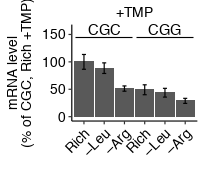

In [40]:
options(repr.plot.width = 1.7, repr.plot.height = 1.5)


test <- Vectorize(function(x) {
  data %>% select(samplelabel)
})

p  <- data %>% 
  ggplot(aes(x = forcats::fct_rev(xlabel), y = mean_normalizedRNAlevel * 100)) +
  geom_col() +
  geom_errorbar(aes(ymin = (mean_normalizedRNAlevel - sterr)*100,
                    ymax = (mean_normalizedRNAlevel + sterr)*100), 
                width = 0.2, size = 0.25)  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5, size=8)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 160)) +
  scale_x_discrete(labels = test) +
  xlab("") + ylab("mRNA level\n(% of CGC, Rich +TMP)") + ggtitle("+TMP")+
  annotate("segment", x = 0.6, xend = 3.4, y = 144, yend = 144, size = 0.25) +
  annotate("text", x = 2, y = 149, label = "CGC", vjust = 0, size = 3) +
  annotate("segment", x = 3.6, xend = 6.4, y = 144, yend = 144, size = 0.25) +
  annotate("text", x = 5, y = 149, label = "CGG", vjust = 0, size = 3) 

p

ggsave("../figures/suppfig6c_1.pdf", width = 1.7, height = 1.5, device = cairo_pdf)

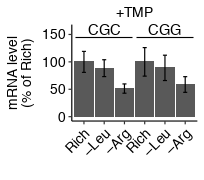

In [29]:
options(repr.plot.width = 1.7, repr.plot.height = 1.5)


test <- Vectorize(function(x) {
  data %>% select(samplelabel)
})

p  <- data %>% 
  ggplot(aes(x = forcats::fct_rev(xlabel), y = normalizedtorich_withinreporter * 100)) +
  geom_col() +
  geom_errorbar(aes(ymin = (normalizedtorich_withinreporter - sterr_normalized)*100,
                    ymax = (normalizedtorich_withinreporter + sterr_normalized)*100), 
                width = 0.2, size = 0.25)  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5, size=8)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 160)) +
  scale_x_discrete(labels = test) +
  xlab("") + ylab("mRNA level\n(% of Rich)") + ggtitle("+TMP")+
  annotate("segment", x = 0.6, xend = 3.4, y = 144, yend = 144, size = 0.25) +
  annotate("text", x = 2, y = 149, label = "CGC", vjust = 0, size = 3) +
  annotate("segment", x = 3.6, xend = 6.4, y = 144, yend = 144, size = 0.25) +
  annotate("text", x = 5, y = 149, label = "CGG", vjust = 0, size = 3) 

p

ggsave("../figures/suppfig6c_3.pdf", width = 1.7, height = 1.5, device = cairo_pdf)

# repeat for HEK293T Arg codon variants YFP-CGC –TMP vs. YFP-CGG –TMP, CRISPR reporter @ AAVS1 (supp. fig. 6d, second/fourth panels)

In [36]:
file <- "../rawdata/rt_qpcr/suppfig6//mRNAlevelpsr_yfpWTvsCGG_crispraavs1293t_24h_richleuarg_plusminustmp/processeddata/20160627_yfpwtcgg_crispraavs1_hek293t_24h_3reps_richleuarg_minustmp.csv"
data <- read_csv(file, col_types = c(col_integer())) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(reporter, samplelabel, sep = "_")) %>% 
  arrange(sampleorder) %>% 
  print

# A tibble: 6 x 12
  tmp_10uM samplelabel mean_normalizedRNAlevel      stdev      sterr reporter
     <chr>       <chr>                   <dbl>      <dbl>      <dbl>    <chr>
1    minus        Rich               0.7714454 0.19394981 0.11197697       WT
2    minus        –Leu               0.8810511 0.26052854 0.15041622       WT
3    minus        –Arg               0.4544490 0.07951072 0.04590554       WT
4    minus        Rich               0.5582555 0.14153795 0.08171697      CGG
5    minus        –Leu               0.4933928 0.09744308 0.05625879      CGG
6    minus        –Arg               0.2615689 0.07780827 0.04492263      CGG
# ... with 6 more variables: time <int>, sampleorder <int>,
#   normalizedtorich_withinreporter <dbl>, stdev_normalized <dbl>,
#   sterr_normalized <dbl>, xlabel <chr>


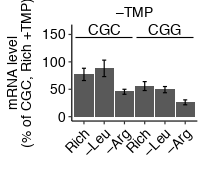

In [38]:
options(repr.plot.width = 1.7, repr.plot.height = 1.5)


test <- Vectorize(function(x) {
  data %>% select(samplelabel)
})

p  <- data %>% 
  ggplot(aes(x = forcats::fct_rev(xlabel), y = mean_normalizedRNAlevel * 100)) +
  geom_col() +
  geom_errorbar(aes(ymin = (mean_normalizedRNAlevel - sterr)*100,
                    ymax = (mean_normalizedRNAlevel + sterr)*100), 
                width = 0.2, size = 0.25)  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5, size=8)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 160)) +
  scale_x_discrete(labels = test) +
  xlab("") + ylab("mRNA level\n(% of CGC, Rich +TMP)") + ggtitle("–TMP")+
  annotate("segment", x = 0.6, xend = 3.4, y = 144, yend = 144, size = 0.25) +
  annotate("text", x = 2, y = 149, label = "CGC", vjust = 0, size = 3) +
  annotate("segment", x = 3.6, xend = 6.4, y = 144, yend = 144, size = 0.25) +
  annotate("text", x = 5, y = 149, label = "CGG", vjust = 0, size = 3) 

p

ggsave("../figures/suppfig6c_2.pdf", width = 1.7, height = 1.5, device = cairo_pdf)

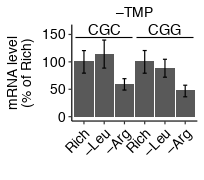

In [27]:
options(repr.plot.width = 1.7, repr.plot.height = 1.5)


test <- Vectorize(function(x) {
  data %>% select(samplelabel)
})

p  <- data %>% 
  ggplot(aes(x = forcats::fct_rev(xlabel), y = normalizedtorich_withinreporter * 100)) +
  geom_col() +
  geom_errorbar(aes(ymin = (normalizedtorich_withinreporter - sterr_normalized)*100,
                    ymax = (normalizedtorich_withinreporter + sterr_normalized)*100), 
                width = 0.2, size = 0.25)  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5, size=8)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 160)) +
  scale_x_discrete(labels = test) +
  xlab("") + ylab("mRNA level\n(% of Rich)") + ggtitle("–TMP")+
  annotate("segment", x = 0.6, xend = 3.4, y = 144, yend = 144, size = 0.25) +
  annotate("text", x = 2, y = 149, label = "CGC", vjust = 0, size = 3) +
  annotate("segment", x = 3.6, xend = 6.4, y = 144, yend = 144, size = 0.25) +
  annotate("text", x = 5, y = 149, label = "CGG", vjust = 0, size = 3) 

p

ggsave("../figures/suppfig6c_5.pdf", width = 1.7, height = 1.5, device = cairo_pdf)

# repeat for HEK293T Arg codon variants  ratio YFP-CGG/YFP-CGC, CRISPR reporter @ AAVS1 (supp. fig. 6d, last panel)

In [30]:
file <- "../rawdata/rt_qpcr/suppfig6//mRNAlevelpsr_yfpWTvsCGG_crispraavs1293t_24h_richleuarg_plusminustmp/processeddata//yfpwtcgg_RATIO_crispraavs1_hek293t_24h_3reps_richleuarg.csv"
data <- read_csv(file, col_types = c(col_integer())) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(tmp_10uM, samplelabel, sep = "_")) %>% 
  arrange(sampleorder) %>% 
  print

# A tibble: 6 x 8
  tmp_10uM samplelabel ratio_cggovercgc     stdev     sterr  time sampleorder
     <chr>       <chr>            <dbl>     <dbl>     <dbl> <int>       <int>
1     plus        Rich        0.4908208 0.1941928 0.1121172    24           1
2     plus        –Leu        0.4935856 0.1822650 0.1052308    24           2
3     plus        –Arg        0.5618216 0.1802695 0.1040787    24           3
4    minus        Rich        0.7236488 0.2583822 0.1491770    24           4
5    minus        –Leu        0.5600048 0.1991321 0.1149690    24           5
6    minus        –Arg        0.5755736 0.1986340 0.1146814    24           6
# ... with 1 more variables: xlabel <chr>


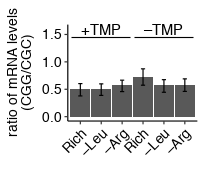

In [32]:
options(repr.plot.width = 1.7, repr.plot.height = 1.5)


test <- Vectorize(function(x) {
  data %>% select(samplelabel)
})

p  <- data %>% 
  ggplot(aes(x = forcats::fct_rev(xlabel), y = ratio_cggovercgc)) +
  geom_col() +
  geom_errorbar(aes(ymin = (ratio_cggovercgc - sterr),
                    ymax = (ratio_cggovercgc + sterr)), 
                width = 0.2, size = 0.25)  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5, size=8)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 1.6)) +
  scale_x_discrete(labels = test) +
  xlab("") + ylab("ratio of mRNA levels\n(CGG/CGC)") + ggtitle(" ")+
  annotate("segment", x = 0.6, xend = 3.4, y = 1.440, yend = 1.440, size = 0.25) +
  annotate("text", x = 2, y = 1.49, label = "+TMP", vjust = 0, size = 3) +
  annotate("segment", x = 3.6, xend = 6.4, y = 1.440, yend = 1.440, size = 0.25) +
  annotate("text", x = 5, y = 1.49, label = "–TMP", vjust = 0, size = 3) 

p

ggsave("../figures/suppfig6c_6.pdf", width = 1.7, height = 1.5, device = cairo_pdf)

# repeat for HEK293T & GCN2 KO premature termination reporter codon variants uug8, cua8 (supp. fig. 6e)

In [57]:
datafiles <- '../rawdata/rt_qpcr/suppfig6/mRNAlevelptr_cua8uug8_wtgcn2kO_48h_richleuarg_minustmp/processeddata/'  %>% 
  list.files(pattern = "csv$", full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("/([^_/]+)[^/]+$") %>% 
  magrittr::extract(,2) %>%
  print
data <- datafiles %>% 
  lapply(. %>% read_csv(col_types = c(col_character()))) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows() %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(celline, samplelabel, sep = "_")) %>% 
  mutate(sampleorder = c(1,2,3,4,5,6,7,8,9,10,11,12)) %>% 
  mutate(xlabel = forcats::fct_reorder(xlabel, sampleorder)) %>% 
  arrange(sampleorder) %>% 
  print

[1] "cta8" "ttg8"
# A tibble: 12 x 15
   celline reporter samplelabel relativenormalizedexpressionlevel_prepause
     <chr>    <chr>       <chr>                                      <dbl>
 1      WT     CTA8        Rich                                  1.0000000
 2      WT     CTA8        –Leu                                  2.3275455
 3      WT     CTA8        –Arg                                  1.3432147
 4 GCN2 KO     CTA8        Rich                                  1.0350830
 5 GCN2 KO     CTA8        –Leu                                  4.9146028
 6 GCN2 KO     CTA8        –Arg                                  2.7036970
 7      WT     TTG8        Rich                                  0.8733204
 8      WT     TTG8        –Leu                                  3.4052888
 9      WT     TTG8        –Arg                                  1.1909499
10 GCN2 KO     TTG8        Rich                                  1.2116388
11 GCN2 KO     TTG8        –Leu                               

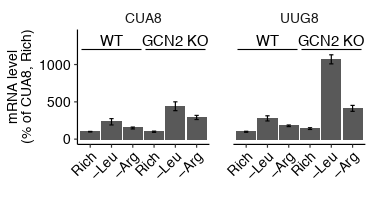

In [74]:
options(repr.plot.width = 3.1, repr.plot.height = 1.7)

test <- Vectorize(function(x) {
  data %>% select(samplelabel)
})

data %>% mutate(reporter = stringr::str_replace(reporter, "TTG", "UUG")) %>% mutate(reporter = stringr::str_replace(reporter, "CTA", "CUA")) %>%
  ggplot(aes(x = xlabel, y = relativenormalizedexpressionlevel_spanpause * 100)) +
  geom_col() +
  geom_errorbar(aes(ymin = (relativenormalizedexpressionlevel_spanpause - sem_spanpause)*100,
                    ymax = (relativenormalizedexpressionlevel_spanpause + sem_spanpause)*100), 
                width = 0.2, size = 0.25)  +
  facet_wrap(~reporter, ncol = 2, scales = "free_x") +
  scale_x_discrete(labels = test) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 1400)) +
  xlab("") + ylab("mRNA level\n(% of CUA8, Rich)") +
  theme(panel.spacing = unit(1, "lines"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  annotate("segment", x = 0.6, xend = 3.4, y = 1200, yend = 1200, size = 0.25) +
  annotate("text", x = 2, y = 1250, label = "WT", vjust = 0, size = 3) +
  annotate("segment", x = 3.6, xend = 6.4, y = 1200, yend = 1200, size = 0.25) +
  annotate("text", x = 5, y = 1250, label = "GCN2 KO", vjust = 0, size = 3) 


ggsave("../figures/suppfig6d.pdf", width = 3.1, height = 1.7, device = cairo_pdf)